In [1]:
import tensorflow as tf
import numpy as np

from rcnn.simple_nn import build_rpn, build_shared
from rcnn.video_parser import get_data
from rcnn.data_generators import get_anchor, video_streamer

import pickle

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
data,_,_ = get_data('./videos/', './annotations/')

Parsing annotation files


In [3]:
with open('config.pickle', 'rb') as f:
    C = pickle.load(f)

In [4]:
data_gen = video_streamer(data, 2, C, lambda x,y: [x,y], 'tf', 'test')

In [5]:
x = next(data_gen)

In [6]:
x[1][0].shape

(4, 8, 32, 32, 18)

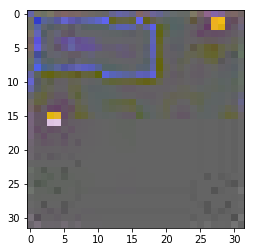

In [241]:
plt.imshow(x[0][0,7])
plt.show()

In [8]:
x[0][3,7]

array([[[ 140.,  155.,  148.],
        [ 125.,  142.,  155.],
        [ 135.,  147.,  155.],
        ..., 
        [ 155.,  155.,  155.],
        [ 140.,  140.,  140.],
        [ 155.,  155.,  155.]],

       [[ 131.,  149.,  155.],
        [ -61.,  -53.,   46.],
        [ -98.,  -99.,   80.],
        ..., 
        [-100., -100., -100.],
        [ -81.,  -81.,  -81.],
        [ 140.,  140.,  140.]],

       [[ 141.,  150.,  155.],
        [ -92.,  -94.,   67.],
        [-100., -100.,  146.],
        ..., 
        [ -97.,  -97.,  -97.],
        [-100., -100., -100.],
        [ 155.,  155.,  155.]],

       ..., 
       [[ 155.,  149.,  155.],
        [ -99., -100.,  -91.],
        [ -99.,  -98., -100.],
        ..., 
        [ -97.,  -97.,  -97.],
        [-100., -100., -100.],
        [ 155.,  155.,  155.]],

       [[ 155.,  141.,  155.],
        [ -66.,  -78.,  -58.],
        [ -96., -100., -100.],
        ..., 
        [-100., -100., -100.],
        [ -81.,  -81.,  -81.],
        [ 

In [9]:
num_anchors = len(C.anchor_box_ratios) * len(C.anchor_box_scales)

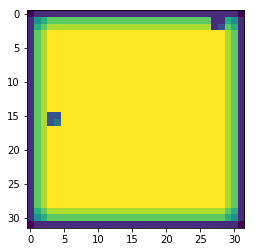

In [240]:
plt.imshow((x[1][0][0,7][...,:num_anchors]).sum(axis=-1))
plt.show()

In [11]:
sess = tf.Session()

In [12]:
video_input = tf.placeholder(tf.float32, [None, None, None, None, 3])

In [13]:
base = build_shared(video_input)
rpn = build_rpn(base, num_anchors)

In [14]:
saver = tf.train.Saver()

In [242]:
saver.restore(sess, './save_dir/rpn_only.sv')

INFO:tensorflow:Restoring parameters from ./save_dir/rpn_only.sv


In [243]:
def predict_rpn(X):
    return sess.run(rpn, {video_input:X})

In [244]:
preds = predict_rpn(x[0])[0]

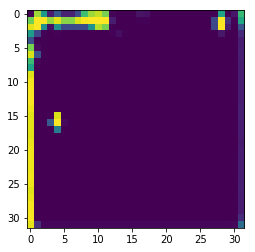

In [245]:
plt.imshow(preds[0,7].max(axis=-1))
plt.show()

In [141]:
preds[1,7].max(axis=-1)

array([[ 0.9929865 ,  0.99820745,  0.99818295, ...,  0.99824727,
         0.99805754,  0.93583316],
       [ 0.99680859,  0.99855739,  0.99833184, ...,  0.99836463,
         0.99851006,  0.92697704],
       [ 0.99636984,  0.99868816,  0.99823016, ...,  0.99866128,
         0.99824971,  0.9500432 ],
       ..., 
       [ 0.99731892,  0.99868494,  0.99801326, ...,  0.99873823,
         0.99832207,  0.95351499],
       [ 0.99706984,  0.99761826,  0.99658382, ...,  0.9967097 ,
         0.99620348,  0.94553596],
       [ 0.86562389,  0.8502391 ,  0.84071904, ...,  0.83726591,
         0.86525089,  0.7640335 ]], dtype=float32)

In [17]:
preds.shape

(4, 8, 32, 32, 9)